In [2]:
import pandas as pd
import seaborn as sb 
import matplotlib.pyplot as plt
import numpy as np 
import warnings as w
w.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Bangalore_home_pricing.csv')


In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum() 

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# ```Data Preprocessing```

In [7]:
df['size'].fillna(value=df['size'].mode().iloc[0],inplace=True)

In [8]:
df.bath.fillna(value=df.bath.mode().iloc[0],inplace=True)

In [9]:
df.balcony.fillna(value=df.balcony.mode().iloc[0],inplace=True)

### ```Since the no of missing values in society column is very large so we can't replace them with mode because due to this the prediction is biased towards this societies so we have to remove this column.```

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# ```Feature Engineering```

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['size'] = encoder.fit_transform(df['size'])

In [14]:
 #! Cleaning total_sqft column
def avg(x):
    if '-' in x:
        lower, upper = map(float, x.split('-'))
        return (lower + upper) / 2
    elif ord(x[-1]) in range(65,123):
        return 0
    else:        
        return (x)

In [15]:
df['total_sqft'] = df['total_sqft'].apply(avg)

In [16]:
df['total_sqft'] = df['total_sqft'].astype(float)

In [17]:
df.drop(df[df['total_sqft'] == 0].index,inplace=True)

# ```Feature Selection```

In [18]:
df.shape

(13274, 9)

In [19]:
features = df.iloc[:,[3,5,6,7,8]]
X = df.iloc[:,[3,5,6,7]]
y = df.iloc[:,-1]

In [20]:
features.corr()

,size,total_sqft,bath,balcony,price
size,1.000000,0.318555,0.673989,0.257070,0.334778
total_sqft,0.318555,1.000000,0.389223,0.154499,0.575559
bath,0.673989,0.389223,1.000000,0.207395,0.454091
balcony,0.257070,0.154499,0.207395,1.000000,0.124893
price,0.334778,0.575559,0.454091,0.124893,1.000000


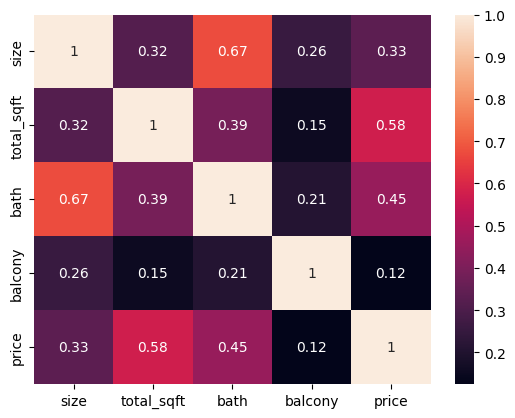

In [21]:
sb.heatmap(features.corr(),annot=True)
plt.show()

# ```Train Test Split```

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

# ```Model Training```

In [23]:
from sklearn.svm import SVR
regressor = SVR()

In [24]:
regressor.fit(X_train,y_train)

SVR()

In [25]:
y_pred = regressor.predict(X_test)

# ```Q1. In order to predict house price based on several characteristics, such as location, square footage,number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?```

## When developing an SVM regression model to predict house prices based on several characteristics, the regression metric that would be best to employ depends on the specific goals of the analysis. 

## If the goal is to minimize the absolute difference between predicted and actual house prices, then the Mean Absolute Error (MAE) regression metric should be used. If the goal is to minimize the squared difference between predicted and actual house prices, then the Mean Squared Error (MSE) regression metric should be used. 

## Alternatively, if the goal is to assess the proportion of variance in the dependent variable (house price) that can be explained by the independent variables (characteristics), then the coefficient of determination (R-squared) regression metric should be used.

In [26]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

In [27]:
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'r2_score: {r2_score(y_test,y_pred)}')

MAE: 37.86184826309867
MSE: 7028.066750980005
r2_score: 0.4730365244503334


# ```Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?```
## In this case, Mean Squared Error (MSE) would be the more appropriate evaluation metric. The goal is to predict the actual price of a house as accurately as possible, and MSE measures the average squared difference between the predicted and actual values. In other words, it measures how close the predicted values are to the actual values. On the other hand, R-squared measures the proportion of variance in the target variable that is explained by the model. While it provides a measure of how well the model fits the data, it does not directly measure the accuracy of the predicted values. Therefore, in this case, MSE would be a more appropriate metric for evaluating the performance of the SVM regression model.

In [28]:
print(f'MSE: {mean_squared_error(y_test,y_pred)}')

MSE: 7028.066750980005


# ```Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?```
## When dealing with a dataset that has a significant number of outliers, it is recommended to use a regression metric that is less sensitive to outliers. One such metric is the Mean Absolute Error (MAE) which computes the average of the absolute differences between the predicted and actual values. MAE is less sensitive to outliers because it does not square the differences, as opposed to other regression metrics like Mean Squared Error (MSE) or R-squared. Therefore, it gives equal weight to all the errors and is less influenced by the presence of outliers.

In [29]:
print(f'MAE: {mean_absolute_error(y_test,y_pred)}')

MAE: 37.86184826309867


# ```Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?```
## If both the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are very close in value, it is generally recommended to use RMSE as the evaluation metric. RMSE has the advantage of being in the same units as the dependent variable, which makes it easier to interpret the results. Additionally, RMSE penalizes larger errors more than smaller errors, which is particularly useful in regression problems where large errors can be especially problematic. Therefore, RMSE is often preferred over MSE when evaluating the performance of regression models.

# ```Q5. You are comparing the performance of different SVM regression models using different kernels (linear,polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?```
## The most appropriate evaluation metric in this case would be R-squared (coefficient of determination). R-squared measures the proportion of the variance in the target variable that is explained by the model, and therefore is a good metric for assessing how well the model fits the data. It ranges from 0 to 1, with higher values indicating a better fit. Thus, when comparing the performance of different SVM regression models using different kernels, R-squared would be the most appropriate metric to evaluate how well the models explain the variance in the target variable.